In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
kgp = pd.read_csv('data/kgp.csv')
bha = pd.read_csv('data/bha.csv')

In [121]:
state = 'Delhi'

In [122]:
kgp['count'] = kgp['count'] / kgp['count'].max()

df = bha[bha['state'] == state]
df = df.reset_index(drop = True)

mx = df.describe().loc['max']['count']
cutoff = mx * 0.05

df['count'] = df['count'] / mx

df['rm'] = df['count'].rolling(5).mean()

df

,date,state,count,rm
0,2020-03-02,Delhi,0.000035,NaN
1,2020-03-03,Delhi,0.000000,NaN
2,2020-03-04,Delhi,0.000000,NaN
3,2020-03-05,Delhi,0.000035,NaN
4,2020-03-06,Delhi,0.000035,0.000021
...,...,...,...,...
604,2021-10-27,Delhi,0.001338,0.001289
605,2021-10-28,Delhi,0.001479,0.001303
606,2021-10-29,Delhi,0.001303,0.001303
607,2021-10-30,Delhi,0.001303,0.001373


In [123]:
id_start = 0
id_end = df['count'].idxmax()

mx = df.describe().loc['max']['count']
cutoff = mx * 0.05

for id in range(id_end, 0, -1):
    if df.iloc[id]['count'] < cutoff:
        id_start = id
        break
id_start, id_end, df.iloc[id_start]['count'], df.iloc[id_end]['count']

(393, 414, 0.03493572812114809, 1.0)

In [124]:
df = df.iloc[id_start : id_end+1]
df = df.reset_index(drop = True)
df

,date,state,count,rm
0,2021-03-30,Delhi,0.034936,0.055425
1,2021-03-31,Delhi,0.064061,0.057433
2,2021-04-01,Delhi,0.098257,0.066110
3,2021-04-02,Delhi,0.126572,0.078176
4,2021-04-03,Delhi,0.125621,0.089889
5,2021-04-04,Delhi,0.142032,0.111308
6,2021-04-05,Delhi,0.124952,0.123487
7,2021-04-06,Delhi,0.179609,0.139757
8,2021-04-07,Delhi,0.193907,0.153224
9,2021-04-08,Delhi,0.261912,0.180482


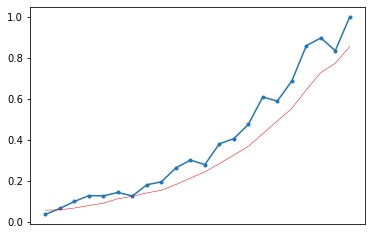

In [125]:
plt.plot(df['date'], df['count'], '.-')
plt.plot(df['date'], df['rm'], 'r', linewidth = 0.5)
plt.xticks([])
plt.show()

In [126]:
from math import ceil

def get_sample(sequence, num):
    length = float(len(sequence))
    res = []
    for i in range(num):
        res.append(sequence[int(ceil(i * length / num))])
    return res

In [127]:
def get_dist(v1, v2):
    res = 0
    for i in range(len(v1)):
        res = res + (v1[i]-v2[i]) ** 2
    return res

In [128]:
sample = get_sample(df['rm'], 9)
sample

[0.05542525092445853,
 0.07817573516464166,
 0.11130832893114986,
 0.15322415918295476,
 0.21209367846451838,
 0.3248459235780947,
 0.4290332805071316,
 0.6431413981334743,
 0.7727275928860714]

In [129]:
dist = get_dist(sample, kgp['count'])
dist

0.0994494767907105

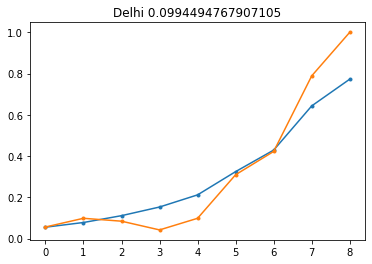

In [130]:
plt.plot(range(0, 9), sample, '.-')
plt.plot(range(0, 9), kgp['count'], '.-')
plt.title(state + ' ' + str(dist))
plt.show()